In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [2]:
from tensorflow.keras.layers import Input

In [7]:
input_shape = (512, 512, 3)

In [8]:
inputs = Input(shape=input_shape)

In [11]:
base_model= ResNet50(weights='imagenet',input_tensor=inputs)

In [12]:
base_model.input_shape

(None, 512, 512, 3)

In [13]:
base_model.output_shape

(None, 1000)

In [16]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 512, 512, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 518, 518, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 256, 256, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 256, 256, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 256, 256, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 258, 258, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 128, 128, 64)   │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 128, 128, 64)   │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 128, 128, 64)   │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 128, 128, 64)   │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 128, 128, 64)   │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 128, 128, 64)   │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 128, 128, 64)   │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 128, 128, 256)  │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 128, 128, 256)  │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [17]:
base_model.save('resnet100.h5')

In [27]:
import numpy as np
# The 'image' module is likely now called 'load_img' and 'img_to_array'.
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions # Import from tensorflow.keras instead of keras

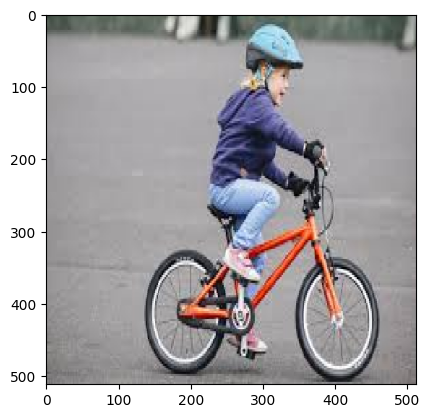

In [29]:
img = load_img('bicycle-kid.jpg',target_size=input_shape)
plt.imshow(img)
img = img_to_array(img)
img = np.expand_dims(img, axis=0)


In [31]:
img = preprocess_input(img)
img

array([[[[-45.939003 , -48.779    , -68.68     ],
         [-45.939003 , -48.779    , -68.68     ],
         [-43.939003 , -46.779    , -66.68     ],
         ...,
         [ 58.060997 ,  46.221    ,  35.32     ],
         [ 50.060997 ,  38.221    ,  27.32     ],
         [ 50.060997 ,  38.221    ,  27.32     ]],

        [[-45.939003 , -48.779    , -68.68     ],
         [-45.939003 , -48.779    , -68.68     ],
         [-43.939003 , -46.779    , -66.68     ],
         ...,
         [ 58.060997 ,  46.221    ,  35.32     ],
         [ 50.060997 ,  38.221    ,  27.32     ],
         [ 50.060997 ,  38.221    ,  27.32     ]],

        [[-45.939003 , -48.779    , -68.68     ],
         [-45.939003 , -48.779    , -68.68     ],
         [-43.939003 , -46.779    , -66.68     ],
         ...,
         [ 58.060997 ,  46.221    ,  35.32     ],
         [ 50.060997 ,  38.221    ,  27.32     ],
         [ 50.060997 ,  38.221    ,  27.32     ]],

        ...,

        [[ 21.060997 ,   7.2210007,   

In [32]:
preds = base_model.predict(img)
preds

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_177']
Received: inputs=Tensor(shape=(1, 512, 512, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[2.64466333e-04, 1.20244877e-05, 1.06436719e-05, 2.37170680e-05,
        6.74322200e-06, 1.66526861e-05, 1.35741755e-06, 1.69275154e-05,
        9.14343036e-06, 1.13351116e-05, 4.15211907e-05, 9.47139051e-06,
        2.62210119e-06, 3.34278207e-06, 7.72809835e-06, 6.39609198e-06,
        1.06743501e-05, 1.22283091e-05, 9.39258553e-06, 1.76599060e-05,
        1.17019326e-05, 5.35674626e-05, 1.16820638e-05, 1.27604862e-05,
        7.30988359e-06, 8.34820457e-06, 8.65464244e-05, 2.43989489e-05,
        2.69597731e-05, 1.40260572e-05, 3.62179617e-06, 9.26579651e-06,
        1.57716804e-05, 5.21867560e-06, 1.67455328e-05, 7.56722693e-06,
        1.35505898e-05, 1.66644975e-06, 2.97015486e-05, 2.57992706e-05,
        8.48791387e-06, 2.50193461e-05, 2.01823113e-05, 3.09461648e-05,
        3.44181717e-05, 3.61365237e-05, 2.77946060e-06, 2.33106330e-05,
        1.02245231e-05, 4.39140240e-06, 1.39904414e-05, 5.13188897e-05,
        5.97668004e-05, 4.74939516e-05, 3.04754576e-05, 1.947149

In [34]:
decode_predictions(preds, top=1)[0]

[('n02835271', 'bicycle-built-for-two', np.float32(0.48987982))]